Employee with Highest Salary in Each Company:
      Company EmployeeID            Name      Salary
2   Cognizant      EID14     Rohit Singh   8500000.0
15   Delloite      EID26  Prakash Sharma  12500000.0
28        E&Y      EID39    Ananya Singh   8000000.0
6        KPMG      EID08    Karan Bhatia  10000000.0
31        PWC      EID02     Varun Kumar  12000000.0
8    Quad EYE      EID12  Ravi Choudhury  11500000.0
10        TCS      EID19      Vikas Nair  11000000.0
0       Xebia      EID01    Arjun Kapoor   6000000.0

Employee with Lowest Salary in Each Company:
      Company EmployeeID            Name      Salary
1   Cognizant      EID27    Aisha Sharma   7000000.0
16   Delloite      EID40       Dev Patel   6000000.0
27        E&Y      EID16    Meena Sharma   5500000.0
29       KPMG      EID23       Jyoti Rao   4000000.0
30        PWC      EID46     Radha Mehra   6000000.0
11   Quad EYE      EID42     Diya Khanna   7000000.0
9         TCS      EID36  Aryan Malhotra  10500000.0
0      

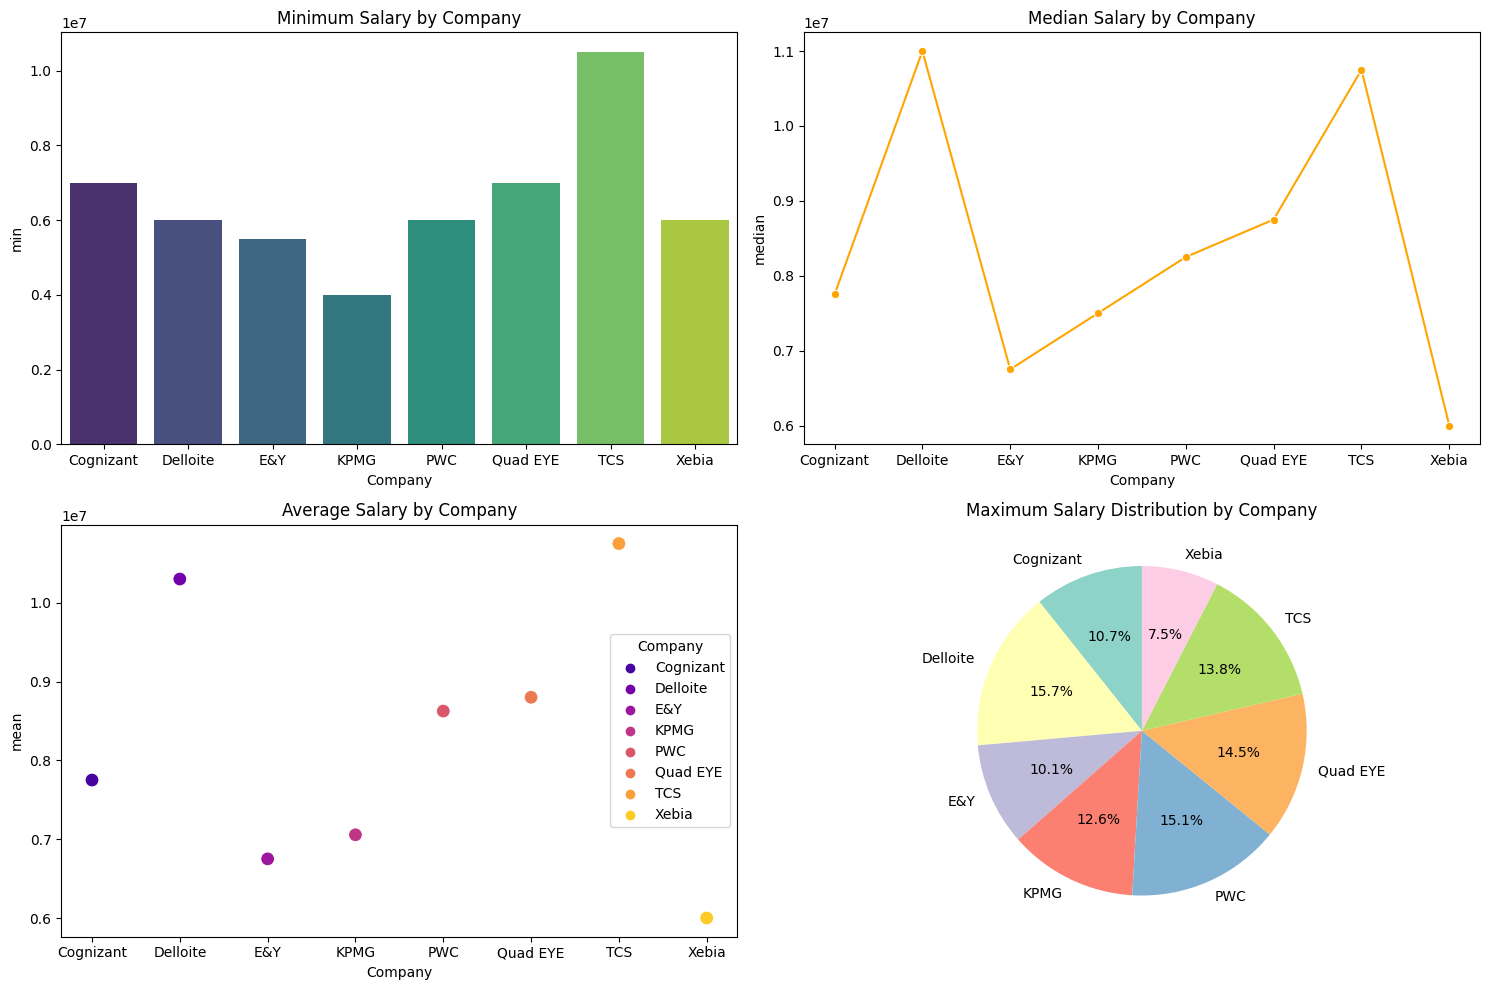

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with your actual file)
file_path = '/content/Employee.csv'
df = pd.read_csv(file_path)

# Convert the 'Salary' column to numeric values
df['Salary'] = df['Salary'].str.replace(',', '').astype(float)

# Calculate minimum, maximum, median, and average salary for each company
summary_stats = df.groupby('Company')['Salary'].agg(['min', 'max', 'median', 'mean']).reset_index()

# Find employee with highest and lowest salary in each company
max_salary_employee = df.loc[df.groupby('Company')['Salary'].idxmax()]
min_salary_employee = df.loc[df.groupby('Company')['Salary'].idxmin()]

# Plotting
plt.figure(figsize=(15, 10))

# Bar Plot
plt.subplot(2, 2, 1)
sns.barplot(x='Company', y='min', data=summary_stats, palette='viridis')
plt.title('Minimum Salary by Company')

# Line Plot
plt.subplot(2, 2, 2)
sns.lineplot(x='Company', y='median', data=summary_stats, marker='o', color='orange')
plt.title('Median Salary by Company')

# Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(x='Company', y='mean', data=summary_stats, hue='Company', s=100, palette='plasma')
plt.title('Average Salary by Company')

# Pie Chart
plt.subplot(2, 2, 4)
plt.pie(summary_stats['max'], labels=summary_stats['Company'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Maximum Salary Distribution by Company')

# Display the employee with the highest and lowest salary in each company
print("Employee with Highest Salary in Each Company:")
print(max_salary_employee[['Company', 'EmployeeID', 'Name', 'Salary']])

print("\nEmployee with Lowest Salary in Each Company:")
print(min_salary_employee[['Company', 'EmployeeID', 'Name', 'Salary']])

plt.tight_layout()
plt.show()